# Lab 2: Data Loading, Cleaning, and Exploration

In this lab, we will cover the following topics:
1. Data loading and cleaning
2. Handling missing data
3. Feature engineering examples
4. Visualizations/data exploration

Each section includes basic implementation and questions for further exploration.

## 1. Data Loading and Cleaning

We will start by loading and cleaning a dataset. We will also explore different techniques for data cleaning.

In [1]:
import functionals as f
import pandas as pd
import numpy as np

# Load the dataset
path_to_file = 'messy_data.csv'
data = pd.read_csv(path_to_file)

# Display dataset information
# data.head()
# data.info(
# data.describe()

# Run the simple model
# f.simple_model(data)

## Data Cleaning

We will clean the dataset by removing duplicates, fixing inconsistent entries and removing outliers.

In [2]:
# Remove duplicates
data_no_duplicates = data.copy().drop_duplicates()

# Fix inconsistent entries
data_format_fixed = data.copy()
data_format_fixed['sex'] = data_format_fixed['sex'].apply(lambda x: 'female' if 'F' in x or 'f' in x else 'male')

# Check for outliers - if they exist, remove them
# <insert code here>

# Dataset with no duplicates, fixed format, missing values and outlier removed (if they exist)
# <insert code here>


### Questions for Exploration

1. How does the following affect model performance?
    * removing duplicates :- Reduces data redundancy and prevents overdrafting.
    * fixing inconsistencies :- Ensures categorical features are correctly encoded, which improves model interpretability and performance.
2. What other inconsistencies can you find and fix in the dataset?
    * Capitalization or missspellings in categorical columns.
    * Incorrect data formates.
    * Mixed units.
3. How does the choice of dataset affect the data cleaning process?
    * Datasets with human-entered text often have more inconsistencies.
    * Different domains (e.g., finance vs. healthcare) have unique cleaning requirements.

## 2. Handling Missing Data

We will handle missing data by using different techniques such as imputation and deletion. We will also explore the impact of these techniques on the dataset.

In [3]:
# Identify missing values
missing_data = data.isnull().sum()
print(missing_data)

# Impute missing values
numerical_col_name = []
categorical_col_name = []
data['age'].fillna(data['age'].mean(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Display the dataset after handling missing data
data.head()


survived         0
deck           885
embarked         3
pclass         107
embark_town      3
sex              0
adult_male       0
who              0
wspd           229
lfwa           229
class            0
tprc             0
sibsp          114
age            329
alone            0
fare           122
parch          116
dtype: int64


C:\Users\sindh\AppData\Local\Temp\ipykernel_24596\1581658940.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
C:\Users\sindh\AppData\Local\Temp\ipykernel_24596\1581658940.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,survived,deck,embarked,pclass,embark_town,sex,adult_male,who,wspd,lfwa,class,tprc,sibsp,age,alone,fare,parch
1,1,C,C,1.0,Cherbourg,female,False,woman,38.0,76.0,First,215.8499,1.0,38.0,False,71.2833,0.0
6,0,E,S,1.0,Southampton,male,True,man,54.0,108.0,First,157.5875,0.0,54.0,True,51.8625,0.0
10,1,G,S,3.0,Southampton,female,False,child,4.0,8.0,Third,52.1000,1.0,4.0,False,16.7000,1.0
21,1,D,S,2.0,Southampton,male,True,man,34.0,68.0,Second,41.0000,0.0,34.0,True,13.0000,0.0
23,1,A,S,1.0,Southampton,male,True,man,28.0,56.0,First,108.5000,0.0,28.0,True,35.5000,0.0


### Questions for Exploration

1. How does the following affect model performance:
    * imputation :- Preserves data quantity; may bias results depending on the method.
    * dropping rows with missing values :- Reduces dataset size; can improve or hurt performance depending on missing data pattern.
2. What happens to the model performance if you use different imputation techniques (e.g., median, mode)?
    * Mean: Sensitive to outliers.
    * Median: Robust to outliers.
    * Mode: Best for categorical data.
    * Each technique may alter model predictions differently.

3. How does the choice of dataset affect the handling of missing data?
    * High-dimensional or sparse datasets may need advanced imputation.
    * Domain knowledge can guide imputation logic.

## 3. Feature Engineering Examples

Next, we will create new features from the existing ones. We will also explore different techniques for feature engineering.

In [4]:
# Create new features
data_new_features = data.copy()
data_new_features['family_size'] = data_new_features['sibsp'] + data_new_features['parch'] + 1
data_new_features['is_alone'] = (data_new_features['family_size'] == 1).astype(int)

# Any other features you can think of?

# Scale the numerical features
# <insert code here>

### Questions for Exploration

1. How do the new features affect model performance?
    * Can reveal hidden patterns and relationships.
    * Often improve performance if meaningful and not redundant.
2. What other features can you create from the existing ones?
    * Interaction terms (e.g., age × income)
    * Time-based features (e.g., year, month from datetime)
    * Binned categories (e.g., age groups)
3. How does feature scaling (e.g., standardization, normalization) affect model performance? (Keep in mind that the data should be scaled **after** data splitting; this will require modifying the simple_model method in functionals.)
    * Essential for models using distance metrics
    * Improves convergence in gradient-based algorithms
    * Must be done after data splitting to prevent data leakage.

## 4. Visualizations/Data Exploration

We will visualize and explore the dataset using different techniques. We will also explore the impact of these visualizations on data interpretation.

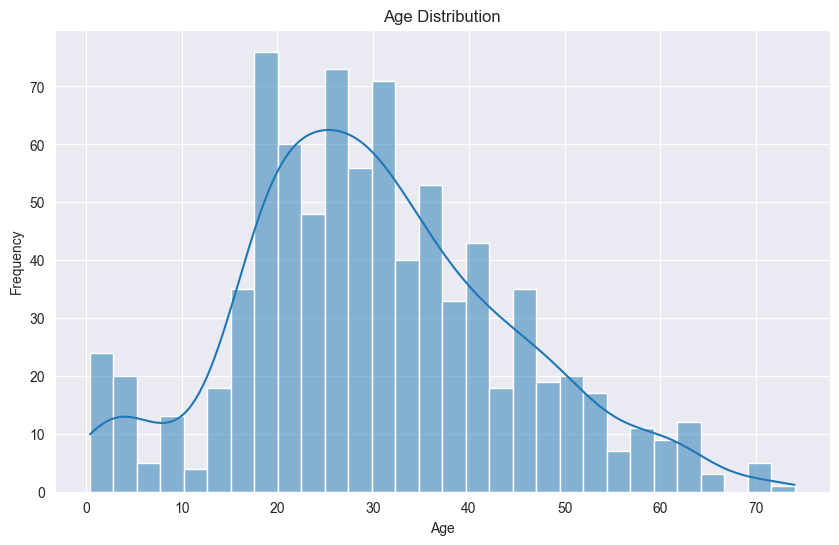

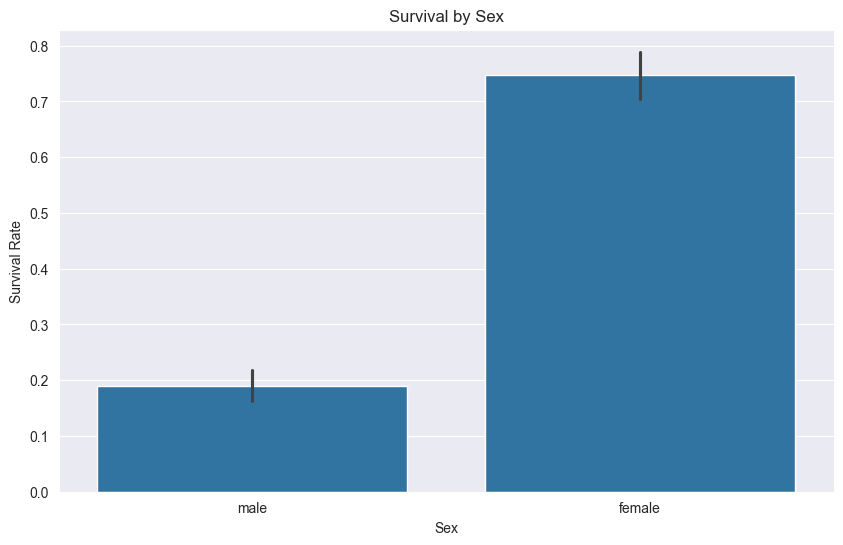

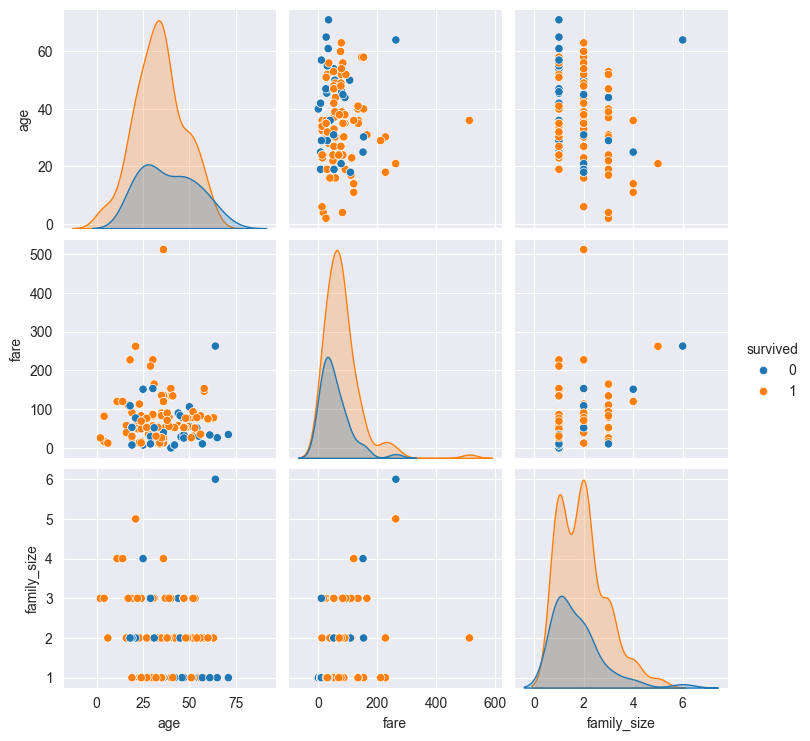

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('messy_data.csv')
# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of survival by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=data)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Pair plot of numerical features
sns.pairplot(data_new_features[['age', 'fare', 'family_size', 'survived']], hue='survived')
plt.show()

### Questions for Exploration

1. How do the visualizations help in understanding the dataset?
    * Highlight distributions, outliers, and trends.
    * Enable quick anomaly detection and data quality checks.
2. What other visualizations can you create to explore the dataset?
    * Correlation heatmaps
    * Histograms and box plots for univariate analysis
    * Scatter plots for bivariate relationships
    * Pair plots for multivariate exploration
3. How does the choice of visualization technique affect the interpretation of the data?
    * Some plots (like violin plots) show more detail than others (like bar plots).
    * Poorly chosen visualizations can obscure patterns or mislead interpretation.




## Extensions

Explore other data preprocessing techniques such as:
- Encoding categorical variables (e.g., one-hot encoding, label encoding) - i.e., if you modify the simple_model method to only include numerical features, omitting the categorical variables
- Feature selection techniques (i.e., assessing inter-feature correlation and removing )

Compare their impact on the dataset and the performance of downstream machine learning models. 
Can you identify any sources of bias in the dataset?